<a href="https://colab.research.google.com/github/GeraldL19/Final-Year-Project-2024/blob/main/Modelling_24_01_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Input

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, f1_score , fbeta_score, precision_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Imbalance
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import RUSBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [13]:
#Import clean dataset from GoogleDrive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Preprocessing**

In [14]:
#Encode categorical values into nnumerical values
df = df.replace({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3})
df = df.replace({'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5})
df = df.replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
df = df.replace({'Y': 0, 'N': 1})

In [9]:
# List of numerical column
cols_to_norm = ['person_age','person_income','person_emp_length','loan_amnt','loan_percent_income','cb_person_cred_hist_length']
# Scaling numerical variables
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [10]:
#Split the datset X independent variables and y dependent variable (target)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

# **Spot Checking Algorithms**

In [15]:
# Split the data into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to try
models = {
    'Logistic Regression' : LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Tree': ExtraTreesClassifier(n_estimators=10, random_state=0),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()
}

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)

    # Append the results to the DataFrame
    results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)

#Higlight the best performers
styled_df = results_df.style.highlight_max(axis=0, color='yellow', subset=['Precision', 'Recall', 'F1 Score', 'F2 Score'])
# Display the results DataFrame
print("\nResults:")
styled_df

Training and evaluating Logistic Regression...
Training and evaluating Naive Bayes...
Training and evaluating Decision Tree...


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)
<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)
<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)


Training and evaluating Random Forest...


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)


Training and evaluating Extra Tree...


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)


Training and evaluating SVM...


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)


Training and evaluating XGBoost...


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)


Training and evaluating Gradient Boosting...


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 4816, number of negative: 17241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 22057, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218343 -> initscore=-1.275347
[LightGBM] [Info] Start training from score -1.275347


<ipython-input-15-6a1f6d23094e>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'F2 Score': f2}, ignore_index=True)



Results:


,Model,Precision,Recall,F1 Score,F2 Score
0,Logistic Regression,0.726923,0.474874,0.574468,0.510259
1,Naive Bayes,0.559083,0.637186,0.595585,0.619867
2,Decision Tree,0.730414,0.754271,0.742151,0.749376
3,Random Forest,0.968493,0.710553,0.819710,0.750531
4,Extra Tree,0.911824,0.685930,0.782908,0.721688
5,SVM,0.866118,0.581910,0.696123,0.622782
6,XGBoost,0.946452,0.737186,0.828814,0.771293
7,Gradient Boosting,0.945615,0.698995,0.803814,0.737462
8,LightGBM,0.981469,0.718593,0.829707,0.759265


*   Looking at this we can see that XGBoost and LightGBM have the best F2 score at around 77%. Their recall is also pretty similar.
*   Random forest also look promising as it has metrix that are balanced and not far behind the 2 best performer.
*   Decision Tree has the best recall which is important in our case as we aim to predict if an applicant is at risk of behing rejected. Furthere to this DT is easily interpretable which is good if we want to explain to the applicant why his application might be rejected.

We decide to go ahead with this four algorythms to the next stage.

# **Spot Checking Resampling methods**

We can see from the lo recaal that we have imbalance and bias. This is showed by the loa recall % and the much lower F2 score.

Therefore we nee to explore ways of dealing with the accuracy paradox.

We will experiment with resampling method such as SMOTE, SMOTE and Tomek and algorithm level methods, to help mitigate the bias toward the majority class.

In [16]:
# List of models to try
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# SMOTE

In [21]:
from sklearn.metrics import roc_auc_score

In [37]:
# Setting SMOTE
smt = SMOTE(random_state=42)

# Split the data into test and train+validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Applying SMOTETomek to the training set
X_smote, y_smote = smt.fit_resample(X_train_temp, y_train_temp)

# Split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.15, random_state=42)

# Now X_train and y_train contain the training data,
# X_val and y_val contain the validation data, and
# X_test and y_test contain the testing data.

In [38]:
# Initialize a DataFrame to store the results
results_val_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
results_test_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_val = model.predict(X_val)

    # Evaluate the model
    accuracy_smote = accuracy_score(y_val, y_pred_val)
    precision_smote = precision_score(y_val, y_pred_val)
    recall_smote = recall_score(y_val, y_pred_val)
    f1_smote = f1_score(y_val, y_pred_val)
    f2_smote = fbeta_score(y_val, y_pred_val, beta=2)
    auc_roc_smote = roc_auc_score(y_val, y_pred_val)


    # Append the results to the DataFrame
    results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote, 'AUC': auc_roc_smote}, ignore_index=True)


    # Predicting values from the imbalanced X_test (i.e X_test without SMOTE)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)
    auc_roc_test = roc_auc_score(y_test, y_pred_test)


    # Append the results to the DataFrame
    results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)

#Higlight the best performers
results_val_df = results_val_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
#Higlight the best performers
results_test_df = results_test_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])


Training and evaluating Random Forest...


<ipython-input-38-29b2586eb4b3>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote, 'AUC': auc_roc_smote}, ignore_index=True)
<ipython-input-38-29b2586eb4b3>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating Decision Tree...


<ipython-input-38-29b2586eb4b3>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote, 'AUC': auc_roc_smote}, ignore_index=True)
<ipython-input-38-29b2586eb4b3>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating XGBoost...


<ipython-input-38-29b2586eb4b3>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote, 'AUC': auc_roc_smote}, ignore_index=True)
<ipython-input-38-29b2586eb4b3>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 17851, number of negative: 17774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 35625, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501081 -> initscore=0.004323
[LightGBM] [Info] Start training from score 0.004323


<ipython-input-38-29b2586eb4b3>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Precision': precision_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote, 'AUC': auc_roc_smote}, ignore_index=True)
<ipython-input-38-29b2586eb4b3>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


In [39]:
# Display the results of the Validation dataset
results_val_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.942262,0.973085,0.908213,0.939530,0.920486,0.941850
1,Decision Tree,0.898680,0.895767,0.899517,0.897638,0.898764,0.898690
2,XGBoost,0.955146,0.990957,0.917552,0.952843,0.931350,0.954691
3,LightGBM,0.951328,0.993999,0.906924,0.948467,0.923097,0.950791


In [40]:
# Display the results of the unseen Test dataset
results_test_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.921515,0.921515,0.725971,0.792853,0.751323,0.849249
1,Decision Tree,0.859107,0.859107,0.750511,0.687910,0.724152,0.818974
2,XGBoost,0.935054,0.935054,0.726994,0.822441,0.762385,0.858162
3,LightGBM,0.936112,0.936112,0.711656,0.821724,0.751945,0.853161


# ADASYN

In [41]:
# Setting ADASYN
ada = ADASYN(random_state=42)

# Split the data into test and train+validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Applying SMOTETomek to the training set
X_adasyn, y_adasyn = ada.fit_resample(X_train_temp, y_train_temp)

# Split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_adasyn, y_adasyn, test_size=0.15, random_state=42)

# Now X_train and y_train contain the training data,
# X_val and y_val contain the validation data, and
# X_test and y_test contain the testing data.

In [42]:
# Initialize a DataFrame to store the results
results_val_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
results_test_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_val = model.predict(X_val)

    # Evaluate the model
    accuracy_adasyn = accuracy_score(y_val, y_pred_val)
    precision_adasyn = precision_score(y_val, y_pred_val)
    recall_adasyn = recall_score(y_val, y_pred_val)
    f1_adasyn = f1_score(y_val, y_pred_val)
    f2_adasyn = fbeta_score(y_val, y_pred_val, beta=2)
    auc_roc_adasyn = roc_auc_score(y_val, y_pred_val)


    # Append the results to the DataFrame
    results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_adasyn, 'Precision': precision_adasyn, 'Recall': recall_adasyn, 'F1 Score': f1_adasyn, 'F2 Score': f2_adasyn, 'AUC': auc_roc_adasyn}, ignore_index=True)


    # Predicting values from the imbalanced X_test (i.e X_test without SMOTE)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)
    auc_roc_test = roc_auc_score(y_test, y_pred_test)


    # Append the results to the DataFrame
    results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)

#Higlight the best performers
results_val_df = results_val_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
#Higlight the best performers
results_test_df = results_test_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

Training and evaluating Random Forest...


<ipython-input-42-64bb5071a257>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_adasyn, 'Precision': precision_adasyn, 'Recall': recall_adasyn, 'F1 Score': f1_adasyn, 'F2 Score': f2_adasyn, 'AUC': auc_roc_adasyn}, ignore_index=True)
<ipython-input-42-64bb5071a257>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating Decision Tree...


<ipython-input-42-64bb5071a257>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_adasyn, 'Precision': precision_adasyn, 'Recall': recall_adasyn, 'F1 Score': f1_adasyn, 'F2 Score': f2_adasyn, 'AUC': auc_roc_adasyn}, ignore_index=True)
<ipython-input-42-64bb5071a257>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating XGBoost...


<ipython-input-42-64bb5071a257>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_adasyn, 'Precision': precision_adasyn, 'Recall': recall_adasyn, 'F1 Score': f1_adasyn, 'F2 Score': f2_adasyn, 'AUC': auc_roc_adasyn}, ignore_index=True)
<ipython-input-42-64bb5071a257>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 17709, number of negative: 17811
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 35520, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498564 -> initscore=-0.005743
[LightGBM] [Info] Start training from score -0.005743


<ipython-input-42-64bb5071a257>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_adasyn, 'Precision': precision_adasyn, 'Recall': recall_adasyn, 'F1 Score': f1_adasyn, 'F2 Score': f2_adasyn, 'AUC': auc_roc_adasyn}, ignore_index=True)
<ipython-input-42-64bb5071a257>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


In [43]:
results_val_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.944010,0.959562,0.926697,0.942843,0.933088,0.943952
1,Decision Tree,0.886266,0.879446,0.894366,0.886843,0.891342,0.886293
2,XGBoost,0.951029,0.988554,0.912292,0.948893,0.926588,0.950900
3,LightGBM,0.947839,0.990530,0.903969,0.945272,0.920050,0.947692


In [44]:
results_test_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.914534,0.914534,0.732106,0.779956,0.750524,0.847115
1,Decision Tree,0.858050,0.858050,0.763804,0.690069,0.732497,0.823220
2,XGBoost,0.933785,0.933785,0.719836,0.818129,0.756176,0.854717
3,LightGBM,0.934842,0.934842,0.712679,0.819036,0.751726,0.852739


# SMOTE and Tomek

In [45]:
# Setting SMOTETomek
smt = SMOTETomek(random_state=42)

# Split the data into test and train+validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Applying SMOTETomek to the training set
X_smt, y_smt = smt.fit_resample(X_train_temp, y_train_temp)

# Split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_smt, y_smt, test_size=0.5, random_state=42)

# Now X_train and y_train contain the training data,
# X_val and y_val contain the validation data, and
# X_test and y_test contain the testing data.

In [46]:
# Initialize a DataFrame to store the results
results_val_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
results_test_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_val = model.predict(X_val)

    # Evaluate the model
    accuracy_smt = accuracy_score(y_val, y_pred_val)
    precision_smt = precision_score(y_val, y_pred_val)
    recall_smt = recall_score(y_val, y_pred_val)
    f1_smt = f1_score(y_val, y_pred_val)
    f2_smt = fbeta_score(y_val, y_pred_val, beta=2)
    auc_roc_smt = roc_auc_score(y_val, y_pred_val)


    # Append the results to the DataFrame
    results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smt, 'Precision': precision_smt, 'Recall': recall_smt, 'F1 Score': f1_smt, 'F2 Score': f2_smt, 'AUC': auc_roc_smt}, ignore_index=True)

    # Predicting values from the imbalanced X_test (i.e X_test without SMOTE)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)
    auc_roc_test = roc_auc_score(y_test, y_pred_test)


    # Append the results to the DataFrame
    results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)

#Higlight the best performers
results_val_df = results_val_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
#Higlight the best performers
results_test_df = results_test_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

Training and evaluating Random Forest...


<ipython-input-46-863910d6c615>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smt, 'Precision': precision_smt, 'Recall': recall_smt, 'F1 Score': f1_smt, 'F2 Score': f2_smt, 'AUC': auc_roc_smt}, ignore_index=True)
<ipython-input-46-863910d6c615>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating Decision Tree...
Training and evaluating XGBoost...


<ipython-input-46-863910d6c615>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smt, 'Precision': precision_smt, 'Recall': recall_smt, 'F1 Score': f1_smt, 'F2 Score': f2_smt, 'AUC': auc_roc_smt}, ignore_index=True)
<ipython-input-46-863910d6c615>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)
<ipython-input-46-863910d6c615>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model

Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 10351, number of negative: 10367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 20718, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499614 -> initscore=-0.001545
[LightGBM] [Info] Start training from score -0.001545


<ipython-input-46-863910d6c615>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smt, 'Precision': precision_smt, 'Recall': recall_smt, 'F1 Score': f1_smt, 'F2 Score': f2_smt, 'AUC': auc_roc_smt}, ignore_index=True)
<ipython-input-46-863910d6c615>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


In [47]:
results_val_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.931605,0.968685,0.892158,0.928848,0.906480,0.931636
1,Decision Tree,0.881842,0.879371,0.885309,0.882330,0.884115,0.881839
2,XGBoost,0.951540,0.983876,0.918202,0.949905,0.930626,0.951565
3,LightGBM,0.950767,0.988911,0.911836,0.948811,0.926274,0.950798


In [48]:
results_test_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.914110,0.914110,0.722904,0.776923,0.743584,0.843447
1,Decision Tree,0.830548,0.830548,0.753579,0.647912,0.707429,0.802103
2,XGBoost,0.931034,0.931034,0.728016,0.813714,0.760034,0.856006
3,LightGBM,0.931881,0.931881,0.710634,0.811916,0.747955,0.850116


# SMOTE + ENN Algorithm

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [51]:
#Setting SMOTEENN
smenn = SMOTEENN(random_state=42)

# Split the data into test and train+validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Applying SMOTETomek to the training set
X_smenn, y_smenn = smenn.fit_resample(X_train_temp, y_train_temp)

# Split the data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_smenn, y_smenn, test_size=0.5, random_state=42)

# Now X_train and y_train contain the training data,
# X_val and y_val contain the validation data, and
# X_test and y_test contain the testing data.

In [52]:
# Initialize a DataFrame to store the results
results_val_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
results_test_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_val = model.predict(X_val)

    # Evaluate the model
    accuracy_smenn = accuracy_score(y_val, y_pred_val)
    precision_smenn = precision_score(y_val, y_pred_val)
    recall_smenn = recall_score(y_val, y_pred_val)
    f1_smenn = f1_score(y_val, y_pred_val)
    f2_smenn = fbeta_score(y_val, y_pred_val, beta=2)
    auc_roc_smenn = roc_auc_score(y_val, y_pred_val)


    # Append the results to the DataFrame
    results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smenn, 'Precision': precision_smenn, 'Recall': recall_smenn, 'F1 Score': f1_smenn, 'F2 Score': f2_smenn, 'AUC': auc_roc_smenn}, ignore_index=True)

    # Predicting values from the imbalanced X_test (i.e X_test without SMOTE)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)
    auc_roc_test = roc_auc_score(y_test, y_pred_test)


    # Append the results to the DataFrame
    results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)

#Higlight the best performers
results_val_df = results_val_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])
#Higlight the best performers
results_test_df = results_test_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'AUC'])

Training and evaluating Random Forest...


<ipython-input-52-5f13e08637ba>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smenn, 'Precision': precision_smenn, 'Recall': recall_smenn, 'F1 Score': f1_smenn, 'F2 Score': f2_smenn, 'AUC': auc_roc_smenn}, ignore_index=True)
<ipython-input-52-5f13e08637ba>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating Decision Tree...


<ipython-input-52-5f13e08637ba>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smenn, 'Precision': precision_smenn, 'Recall': recall_smenn, 'F1 Score': f1_smenn, 'F2 Score': f2_smenn, 'AUC': auc_roc_smenn}, ignore_index=True)
<ipython-input-52-5f13e08637ba>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating XGBoost...


<ipython-input-52-5f13e08637ba>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smenn, 'Precision': precision_smenn, 'Recall': recall_smenn, 'F1 Score': f1_smenn, 'F2 Score': f2_smenn, 'AUC': auc_roc_smenn}, ignore_index=True)
<ipython-input-52-5f13e08637ba>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 9270, number of negative: 7496
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 16766, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552905 -> initscore=0.212414
[LightGBM] [Info] Start training from score 0.212414


<ipython-input-52-5f13e08637ba>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_val_df = results_val_df.append({'Model': model_name, 'Accuracy': accuracy_smenn, 'Precision': precision_smenn, 'Recall': recall_smenn, 'F1 Score': f1_smenn, 'F2 Score': f2_smenn, 'AUC': auc_roc_smenn}, ignore_index=True)
<ipython-input-52-5f13e08637ba>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_test_df = results_test_df.append({'Model': model_name, 'Accuracy': accuracy_test, 'Precision': accuracy_test, 'Recall': recall_test, 'F1 Score': f1_test, 'F2 Score': f2_test, 'AUC': auc_roc_test}, ignore_index=True)


In [53]:
results_val_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.954494,0.974728,0.940926,0.957529,0.947497,0.955842
1,Decision Tree,0.922347,0.930289,0.927032,0.928658,0.927682,0.921882
2,XGBoost,0.970001,0.988575,0.956022,0.972026,0.962360,0.971389
3,LightGBM,0.965706,0.987258,0.949349,0.967933,0.956696,0.967331


In [54]:
results_test_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score,AUC
0,Random Forest,0.873281,0.873281,0.767894,0.714898,0.745780,0.834334
1,Decision Tree,0.835202,0.835202,0.776074,0.660862,0.725483,0.813350
2,XGBoost,0.908822,0.908822,0.749489,0.772799,0.758642,0.849938
3,LightGBM,0.904591,0.904591,0.733129,0.760743,0.743930,0.841224


#Neighborhood Cleaning Rule

In [57]:
# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

#Applying smote to training set
X_smote, y_smote = undersample.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [58]:
# Initialize a DataFrame to store the results
results_smote_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'F1 Score', 'F2 Score'])

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions on the test set
    y_pred_smote = model.predict(X_test_smote)

    # Evaluate the model
    accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
    recall_smote = recall_score(y_test_smote, y_pred_smote)
    f1_smote = f1_score(y_test_smote, y_pred_smote)
    f2_smote = fbeta_score(y_test_smote, y_pred_smote, beta=2)

    # Append the results to the DataFrame
    results_smote_df = results_smote_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote}, ignore_index=True)

Training and evaluating Random Forest...


<ipython-input-58-7987ee602b69>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote_df = results_smote_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote}, ignore_index=True)
<ipython-input-58-7987ee602b69>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote_df = results_smote_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote}, ignore_index=True)


Training and evaluating Decision Tree...
Training and evaluating XGBoost...


<ipython-input-58-7987ee602b69>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote_df = results_smote_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote}, ignore_index=True)


Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 4756, number of negative: 13206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 17962, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264781 -> initscore=-1.021264
[LightGBM] [Info] Start training from score -1.021264


<ipython-input-58-7987ee602b69>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_smote_df = results_smote_df.append({'Model': model_name, 'Accuracy': accuracy_smote, 'Recall': recall_smote, 'F1 Score': f1_smote, 'F2 Score': f2_smote}, ignore_index=True)


In [ ]:
#Higlight the best performers
styled_smote_df = results_smote_df.style.highlight_max(axis=0, color='yellow', subset=['Accuracy', 'Recall', 'F1 Score', 'F2 Score'])
# Display the results DataFrame
print("\nResults:")
styled_smote_df


Results:


,Model,Accuracy,Recall,F1 Score,F2 Score
0,Random Forest,0.926123,0.762207,0.845841,0.793594
1,Decision Tree,0.884835,0.799805,0.786933,0.794606
2,XGBoost,0.928720,0.786133,0.854338,0.812065
3,LightGBM,0.929239,0.771973,0.852981,0.802457


# RUSBoostClassifier

In [55]:
# Split the data into training and testing sets
X_train_rboost, X_test_rboost, y_train_rboost, y_test_rboost = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base decision tree classifier (you can use any classifier)
base_classifier = DecisionTreeClassifier()

# Create the RUSBoostClassifier
rusboost_classifier = RUSBoostClassifier(base_classifier, random_state=42)

In [56]:
# Train the model
rusboost_classifier.fit(X_train_rboost, y_train_rboost)

# Make predictions on the test set
y_pred_rboost = rusboost_classifier.predict(X_test_rboost)

# Evaluate the model
accuracy_rboost = accuracy_score(y_test_rboost, y_pred_rboost)
recall_rboost = recall_score(y_test_rboost, y_pred_rboost)
f1_rboost = f1_score(y_test_rboost, y_pred_rboost)
f2_rboost = fbeta_score(y_test_rboost, y_pred_rboost, beta=2)
conf_matrix_boost = confusion_matrix(y_test_rboost, y_pred_rboost)

print(f'Accuracy: {accuracy_rboost}')
print(f'Recall : {recall_rboost}')
print(f'F1 Score : {f1_rboost}')
print(f'F2 Score : {f2_rboost}\n')
print(f'Confusion Matrix:\n{conf_matrix_boost}')

Accuracy: 0.8978210281362387
Recall : 0.7974874371859296
F1 Score : 0.7666666666666667
F2 Score : 0.7848664688427299

Confusion Matrix:
[[6901  563]
 [ 403 1587]]


# **HyperParameter Tuning**

We take the best overall performing algorythms and resampling method and use a randomiser to find the best parameters for the model

# RandomSearch for SMOTEK and XGBOOST

In [ ]:
#Setting SMOTETomek
smt = SMOTETomek(random_state=42)

#Applying smotetomek to training set
X_smote_tek, y_smote_tek = smt.fit_resample(X, y)

# Split the data into training and testing sets
X_train_tek, X_test_tek, y_train_tek, y_test_tek = train_test_split(X_smote_tek, y_smote_tek, test_size=0.3, random_state=42)

Accuracy: 0.9583304870551267
Recall : 0.9314449917898193
F1 Score : 0.9571147356580426
F2 Score : 0.9415458669912582

Confusion Matrix:
[[7222  109]
 [ 501 6807]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7331
           1       0.98      0.93      0.96      7308

    accuracy                           0.96     14639
   macro avg       0.96      0.96      0.96     14639
weighted avg       0.96      0.96      0.96     14639

ROC AUC Score: 0.9880632641957955



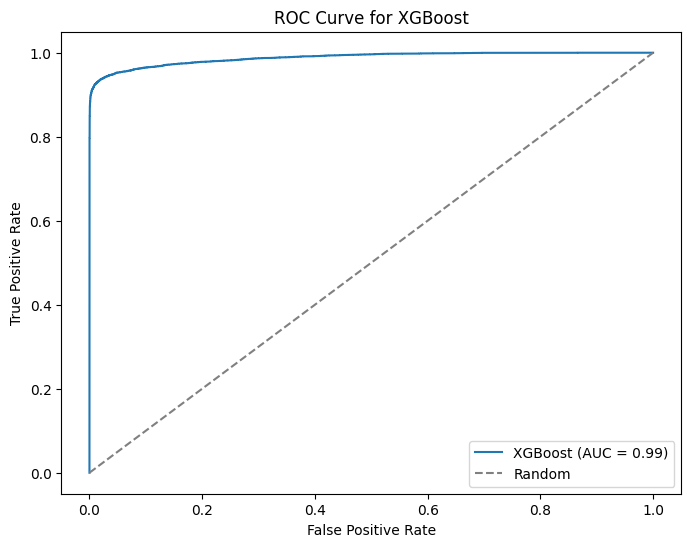

In [ ]:
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.5, 1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.5, 1, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 10]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_grid,
                                   n_iter=10, scoring='recall', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_tek, y_train_tek)

# Get the best model
best_xgb = random_search.best_estimator_

# Make predictions on the test set
y_pred_tek = best_xgb.predict(X_test_tek)

# Evaluate the model
accuracy_rboost = accuracy_score(y_test_tek, y_pred_tek)
recall_rboost = recall_score(y_test_tek, y_pred_tek)
f1_rboost = f1_score(y_test_tek, y_pred_tek)
f2_rboost = fbeta_score(y_test_tek, y_pred_tek, beta=2)
conf_matrix_boost = confusion_matrix(y_test_tek, y_pred_tek)

print(f'Accuracy: {accuracy_rboost}')
print(f'Recall : {recall_rboost}')
print(f'F1 Score : {f1_rboost}')
print(f'F2 Score : {f2_rboost}\n')
print(f'Confusion Matrix:\n{conf_matrix_boost}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_tek, y_pred_tek))

# Get predicted probabilities for positive class
y_prob_tek = best_xgb.predict_proba(X_test_tek)[:, 1]

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test_tek, y_prob_tek)
print(f'ROC AUC Score: {roc_auc_xgb}\n')

# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_tek, y_prob_tek)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

Accuracy: 0.966902823305488
Recall : 0.8671604938271605
F1 Score : 0.9181699346405229
F2 Score : 0.8868686868686868

Confusion Matrix:
[[7388   44]
 [ 269 1756]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7432
           1       0.98      0.87      0.92      2025

    accuracy                           0.97      9457
   macro avg       0.97      0.93      0.95      9457
weighted avg       0.97      0.97      0.97      9457

ROC AUC Score: 0.98607861898497



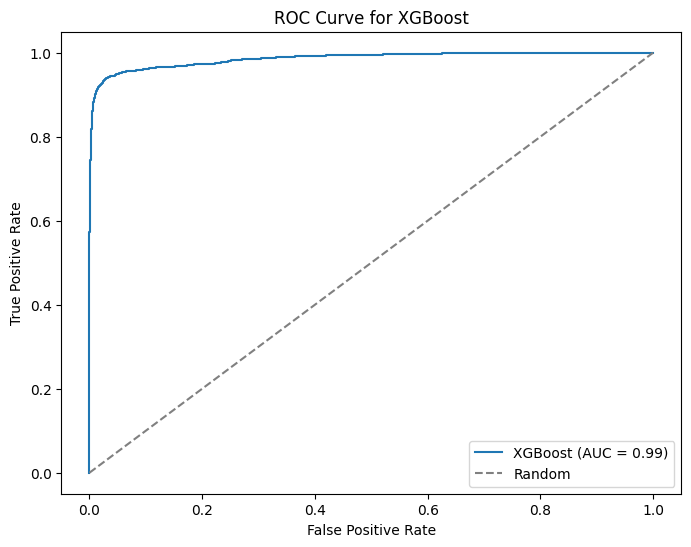

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Predicting values from the imbalanced X_test (i.e X_test without SMOTE)
y_pred_test = best_xgb.predict(X_test)

# Evaluate the model
accuracy_rboost = accuracy_score(y_test, y_pred_test)
recall_rboost = recall_score(y_test, y_pred_test)
f1_rboost = f1_score(y_test, y_pred_test)
f2_rboost = fbeta_score(y_test, y_pred_test, beta=2)
conf_matrix_boost = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy: {accuracy_rboost}')
print(f'Recall : {recall_rboost}')
print(f'F1 Score : {f1_rboost}')
print(f'F2 Score : {f2_rboost}\n')
print(f'Confusion Matrix:\n{conf_matrix_boost}')
print(classification_report(y_test, y_pred_test))

# Get predicted probabilities for positive class
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc_xgb}\n')

# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

In [ ]:
random_search.best_params_

{'subsample': 0.7,
 'reg_lambda': 0.5,
 'reg_alpha': 1,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 11,
 'learning_rate': 0.2,
 'gamma': 0.5,
 'colsample_bytree': 0.7}

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# RandomSearch for SMOTEEN and XGBOOST

In [ ]:
#Setting ADASYN
smenn = SMOTEENN(random_state=42)

#Applying smote to training set
X_smenn, y_smenn = smenn.fit_resample(X, y)

# Split the data into training and testing sets
X_train_smenn, X_test_smenn, y_train_smenn, y_test_smenn = train_test_split(X_smenn, y_smenn, test_size=0.3, random_state=42)

In [ ]:
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.5, 1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.5, 1, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 10]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_grid,
                                   n_iter=10, scoring='recall', cv=3, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(X_train_smenn, y_train_smenn)

# Get the best model
best_xgb_2 = random_search.best_estimator_

# Make predictions on the test set
y_pred_smenn = best_xgb_2.predict(X_test_smenn)

# Evaluate the model
accuracy_smenn = accuracy_score(y_test_smenn, y_pred_smenn)
recall_smenn = recall_score(y_test_smenn, y_pred_smenn)
f1_smenn = f1_score(y_test_smenn, y_pred_smenn)
f2_smenn = fbeta_score(y_test_smenn, y_pred_smenn, beta=2)
conf_matrix_smenn = confusion_matrix(y_test_smenn, y_pred_smenn)

print(f'Accuracy: {accuracy_smenn}')
print(f'Recall : {recall_smenn}')
print(f'F1 Score : {f1_smenn}')
print(f'F2 Score : {f2_smenn}\n')
print(f'Confusion Matrix:\n{conf_matrix_smenn}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_smenn, y_pred_smenn))

Accuracy: 0.9724677948977014
Recall : 0.9629459500842138
F1 Score : 0.9746609841146844
F2 Score : 0.9675980060311404

Confusion Matrix:
[[5261   85]
 [ 242 6289]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5346
           1       0.99      0.96      0.97      6531

    accuracy                           0.97     11877
   macro avg       0.97      0.97      0.97     11877
weighted avg       0.97      0.97      0.97     11877



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Predicting values from the imbalanced X_test (i.e X_test without SMOTE)
y_pred_test_2 = best_xgb_2.predict(X_test)
# Evaluate the model
accuracy_rboost = accuracy_score(y_test, y_pred_test_2)
recall_rboost = recall_score(y_test, y_pred_test_2)
f1_rboost = f1_score(y_test, y_pred_test_2)
f2_rboost = fbeta_score(y_test, y_pred_test_2, beta=2)
conf_matrix_boost = confusion_matrix(y_test, y_pred_test_2)

print(f'Accuracy: {accuracy_rboost}')
print(f'Recall : {recall_rboost}')
print(f'F1 Score : {f1_rboost}')
print(f'F2 Score : {f2_rboost}\n')
print(f'Confusion Matrix:\n{conf_matrix_boost}')
print(classification_report(y_test, y_pred_test_2))

Accuracy: 0.9246061118748017
Recall : 0.8296296296296296
F1 Score : 0.824944758163516
F2 Score : 0.8277493102089081

Confusion Matrix:
[[7064  368]
 [ 345 1680]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7432
           1       0.82      0.83      0.82      2025

    accuracy                           0.92      9457
   macro avg       0.89      0.89      0.89      9457
weighted avg       0.92      0.92      0.92      9457



#GridSearch

In [ ]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=3)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train_tek, y_train_tek)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions on the test set
y_pred_tek = best_xgb.predict(X_test_tek)

# Evaluate the model
accuracy_rboost = accuracy_score(y_test_tek, y_pred_tek)
recall_rboost = recall_score(y_test_tek, y_pred_tek)
f1_rboost = f1_score(y_test_tek, y_pred_tek)
f2_rboost = fbeta_score(y_test_tek, y_pred_tek, beta=2)
conf_matrix_boost = confusion_matrix(y_test_tek, y_pred_tek)

print(f'Accuracy: {accuracy_rboost}')
print(f'Recall : {recall_rboost}')
print(f'F1 Score : {f1_rboost}')
print(f'F2 Score : {f2_rboost}\n')
print(f'Confusion Matrix:\n{conf_matrix_boost}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_tek, y_pred_tek))

Accuracy: 0.9511578659744518
Recall : 0.9102353585112206
F1 Score : 0.9489977887153149
F2 Score : 0.9253540327741147

Confusion Matrix:
[[7272   59]
 [ 656 6652]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7331
           1       0.99      0.91      0.95      7308

    accuracy                           0.95     14639
   macro avg       0.95      0.95      0.95     14639
weighted avg       0.95      0.95      0.95     14639



#**Indiviudal Algorithm Test**

# Decision Tree

In [ ]:
# Split the data into training and testing sets
X_train_csdt, X_test_csdt, y_train_csdt, y_test_csdt = train_test_split(X, y, test_size=0.3, random_state=42)

# define model
csdt = DecisionTreeClassifier(
    criterion='gini',
    class_weight={0: 1, 1: 10}
)
# Train the model
csdt.fit(X_train_csdt, y_train_csdt)

# Make predictions on the test set
y_pred_csdt = csdt.predict(X_test_csdt)

# Evaluate the model
accuracy_csdt= accuracy_score(y_test_csdt, y_pred_csdt)
recall_csdt = recall_score(y_test_csdt, y_pred_csdt)
f1_csdt = f1_score(y_test_csdt, y_pred_csdt)
f2_csdt = fbeta_score(y_test_csdt, y_pred_csdt, beta=2)
conf_matrix_boost = confusion_matrix(y_test_csdt, y_pred_csdt)

print(f'Accuracy : {accuracy_csdt}')
print(f'Recall : {recall_csdt}')
print(f'F1 Score : {f1_csdt}')
print(f'F2 Score : {f2_csdt}\n')
print(f'Confusion Matrix:\n{conf_matrix_boost}')

Accuracy : 0.8926720947446336
Recall : 0.745679012345679
F1 Score : 0.748451053283767
F2 Score : 0.7467853610286844

Confusion Matrix:
[[6932  500]
 [ 515 1510]]
